In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [3]:
dados = pd.read_csv('dados/dados.csv')
dados.head()

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
0,11,0,23,8,12,800,1.603808
1,11,1,23,2,12,1150,1.739790
2,11,1,35,8,15,880,1.760444
3,11,0,46,2,6,3500,1.783158
4,11,1,47,8,9,150,1.690631


## Distribição de frequência

In [4]:
minimo = 788
classes = [dados.Renda.min(),minimo*2,minimo*5,minimo*15,minimo*25,dados.Renda.max()]
classes
labels = ['E','D','C','B','A']
frequencia = pd.value_counts(pd.cut(dados.Renda, bins=classes,labels=labels,include_lowest=True),sort=False)
porcentagem = pd.value_counts(pd.cut(dados.Renda, bins=classes,labels=labels,include_lowest=True),sort=False,normalize=True)*100
dist_freq_renda = pd.DataFrame({'Frequencia':frequencia,'Porcentagem':porcentagem})
dist_freq_renda.rename_axis('Renda', axis=1,inplace=True)
dist_freq_renda.sort_index(ascending=False,inplace=True)
dist_freq_renda

Renda,Frequencia,Porcentagem
A,420,0.546590
B,822,1.069755
C,7241,9.423477
D,18602,24.208745
E,49755,64.751432


<AxesSubplot:>

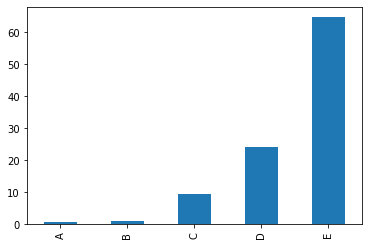

In [5]:
dist_freq_renda.Porcentagem.plot.bar()

## Histogramas

<AxesSubplot:title={'center':'Distribuição de Frequências - Altura'}, xlabel='Metros', ylabel='Count'>

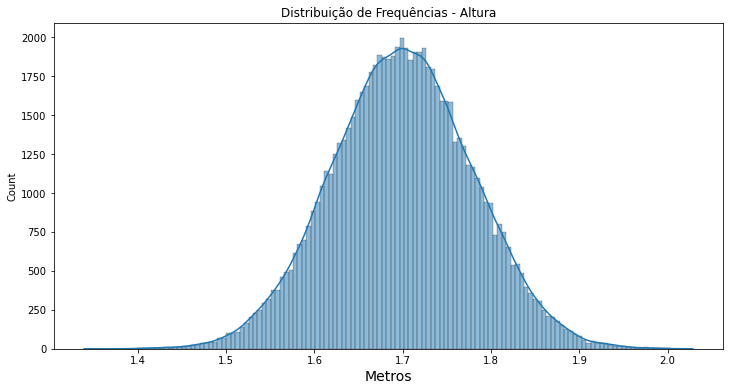

In [6]:
#Histograma Altura
ax = sns.histplot(dados.Altura,kde=True)
ax.figure.set_size_inches(12,6)
ax.set_title('Distribuição de Frequências - Altura')
ax.set_xlabel('Metros', fontsize = 14)
ax

<AxesSubplot:title={'center':'Distribuição de Frequências - Idade'}, xlabel='Anos', ylabel='Count'>

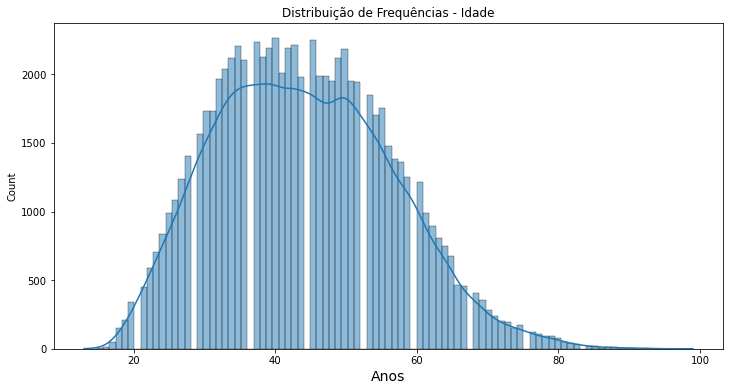

In [7]:
#Histograma idade
ax = sns.histplot(dados.Idade,kde=True)
ax.figure.set_size_inches(12,6)
ax.set_title('Distribuição de Frequências - Idade')
ax.set_xlabel('Anos', fontsize = 14)
ax

C:\Users\MASTER\anaconda3\envs\mateus_pandas\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'Distribuição de Frequências - Renda'}, xlabel='R$', ylabel='Density'>

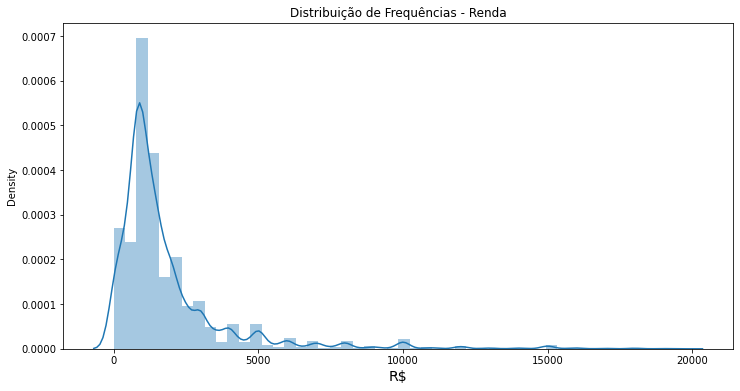

In [48]:
ax = sns.distplot(dados.query('Renda < 20000')['Renda'],kde=True)
ax.figure.set_size_inches(12,6)
ax.set_title('Distribuição de Frequências - Renda')
ax.set_xlabel('R$', fontsize = 14)
ax

In [9]:
#tabela de distribição de frequencias por sexo e cor
frequencia_sexo_cor = pd.crosstab(dados.Sexo,dados.Cor)
frequencia_sexo_cor.rename(index={0:'Maculino', 1:'Feminino'}, 
                      columns = {0: 'Indígena', 2:'Branca', 4:'Preta',6:'Amarela',8:'Parda'}, inplace = True)
frequencia_sexo_cor

Cor,Indígena,Branca,Preta,Amarela,Parda
Sexo,,,,,
Maculino,256,22194,5502,235,25063
Feminino,101,9621,2889,117,10862


In [10]:
#tabela de distribição de frequencias em percentual por sexo e cor
porcentagem_sexo_cor = pd.crosstab(dados.Sexo,dados.Cor,normalize=True)*100
porcentagem_sexo_cor.rename(index={0:'Maculino', 1:'Feminino'}, 
                      columns = {0: 'Indígena', 2:'Branca', 4:'Preta',6:'Amarela',8:'Parda'}, inplace = True)
porcentagem_sexo_cor

Cor,Indígena,Branca,Preta,Amarela,Parda
Sexo,,,,,
Maculino,0.333160,28.883394,7.160333,0.305830,32.617126
Feminino,0.131442,12.520822,3.759761,0.152264,14.135867


## Analise descritiva renda

In [11]:
#Valores de tedencia central e dispersão
dados.Renda.aggregate(['mean','median','mad','var','std']).round(2)

mean          2000.38
median        1200.00
mad           1526.50
var       11044906.01
std           3323.39
Name: Renda, dtype: float64

In [12]:
#moda
dados.Renda.mode()

0    788
dtype: int64

In [13]:
#Valores de tendência central e valor máximo de renda por sexo e cor
central_sexo_cor = pd.crosstab(dados.Sexo,dados.Cor,aggfunc={'mean','median','max'},values = dados.Renda).round(2)
central_sexo_cor.rename(index={0:'Maculino', 1:'Feminino'}, 
                      columns = {0: 'Indígena', 2:'Branca', 4:'Preta',6:'Amarela',8:'Parda'}, inplace = True)
central_sexo_cor

max                                           mean           \
Cor       Indígena    Branca    Preta  Amarela     Parda Indígena   Branca   
Sexo                                                                         
Maculino   10000.0  200000.0  50000.0  50000.0  100000.0  1081.71  2925.74   
Feminino  120000.0  100000.0  23000.0  20000.0   30000.0  2464.39  2109.87   

                                      median                                  
Cor         Preta  Amarela    Parda Indígena  Branca   Preta Amarela   Parda  
Sexo                                                                          
Maculino  1603.86  4758.25  1659.58    797.5  1700.0  1200.0  2800.0  1200.0  
Feminino  1134.60  3027.34  1176.76    788.0  1200.0   800.0  1500.0   800.0

In [14]:
#Valores de dispersão de renda por sexo e cor
dispersao_sexo_cor = pd.crosstab(dados.Sexo,dados.Cor,aggfunc={'mad','var','std'},values = dados.Renda).round(2)
dispersao_sexo_cor.rename(index={0:'Maculino', 1:'Feminino'}, 
                      columns = {0: 'Indígena', 2:'Branca', 4:'Preta',6:'Amarela',8:'Parda'}, inplace = True)
dispersao_sexo_cor

mad                                          std           \
Cor      Indígena   Branca   Preta  Amarela    Parda  Indígena   Branca   
Sexo                                                                      
Maculino   798.91  2261.01  975.60  3709.60  1125.83   1204.09  4750.79   
Feminino  3007.89  1670.97  705.45  2549.15   811.58  11957.50  3251.01   

                                              var                           \
Cor         Preta  Amarela    Parda      Indígena       Branca       Preta   
Sexo                                                                         
Maculino  1936.31  5740.82  2312.09  1.449841e+06  22570023.41  3749293.59   
Feminino  1349.80  3731.17  1596.23  1.429818e+08  10569086.53  1821959.52   

                                   
Cor           Amarela       Parda  
Sexo                               
Maculino  32957069.62  5345747.15  
Feminino  13921656.88  2547959.94

<AxesSubplot:title={'center':'Renda'}, xlabel='Anos', ylabel='Sexo'>

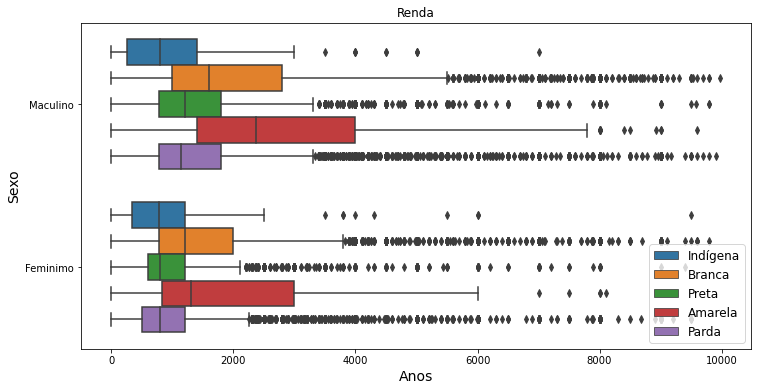

In [47]:
#Box-plot renda por sexo e cor
ax = sns.boxplot(x = 'Renda', y = 'Sexo', hue = 'Cor', data = dados.query('Renda < 10000'),orient='h')
ax.figure.set_size_inches(12,6)
ax.set_title('Renda')
ax.set_ylabel('Sexo',fontsize=14)
ax.set_yticklabels(['Maculino','Feminimo'])
ax.set_xlabel('Anos', fontsize = 14)
handles, _ = ax.get_legend_handles_labels()
ax.legend(handles, ['Indígena', 'Branca', 'Preta', 'Amarela', 'Parda', 'Sem declaração'],fontsize=12)
ax

## Desafio

In [22]:
#Percentil de pessoas que ganham até 788 no dataset
stats.percentileofscore(dados.Renda,788)

24.390942217595004

In [27]:
#Renda máxima de 99% das pessoas do dataset
dados.Renda.quantile(.99)

15000.0

In [28]:
#Tebela de valores centrais e valor máximo de renda por sexo e escolaridade
central_sexo_estudo = pd.crosstab(dados['Anos de Estudo'],dados.Sexo,aggfunc={'mean','median','max'},values = dados.Renda).round(2)
central_sexo_estudo.rename(columns={0:'Maculino', 1:'Feminino'}, 
                      index = {1: 'Sem instrução e menos de 1 ano', 2: '1 ano', 3: '2 anos', 4: '3 anos', 
    5: '4 anos', 6: '5 anos', 7: '6 anos', 8: '7 anos', 9: '8 anos', 10: '9 anos', 11: '10 anos', 12: '11 anos',
    13: '12 anos', 14: '13 anos', 15: '14 anos', 16: '15 anos ou mais', 17: 'Não determinados'}, inplace = True)
central_sexo_estudo

max               mean            median  \
Sexo                            Maculino  Feminino Maculino Feminino Maculino   
Anos de Estudo                                                                  
Sem instrução e menos de 1 ano   30000.0   10000.0   799.49   516.20    700.0   
1 ano                            30000.0    2000.0   895.63   492.77    788.0   
2 anos                           40000.0    4000.0   931.18   529.91    788.0   
3 anos                           80000.0    3500.0  1109.20   546.85    800.0   
4 anos                           50000.0   10000.0  1302.33   704.28   1000.0   
5 anos                           35000.0    8000.0  1338.65   781.39   1045.0   
6 anos                           25000.0    6000.0  1448.88   833.73   1200.0   
7 anos                           40000.0    9000.0  1465.50   830.75   1200.0   
8 anos                           30000.0   18000.0  1639.40   933.62   1300.0   
9 anos                           60000.0   20000.0  1508.04   868.02   1200.0   
10 anos                          45000.0    6000.0  1731.27   925.92   1218.0   
11 anos                         200000.0  100000.0  2117.06  1286.79   1500.0   
12 anos                          30000.0  120000.0  2470.33  1682.31   1800.0   
13 anos                          25000.0   20000.0  3195.10  1911.73   2400.0   
14 anos                          50000.0   20000.0  3706.62  2226.46   2500.0   
15 anos ou mais                 200000.0  100000.0  6134.28  3899.51   4000.0   
Não determinados                  7000.0    3000.0  1295.76   798.17   1200.0   

                                         
Sexo                           Feminino  
Anos de Estudo                           
Sem instrução e menos de 1 ano    390.0  
1 ano                             400.0  
2 anos                            450.0  
3 anos                            500.0  
4 anos                            788.0  
5 anos                            788.0  
6 anos                            788.0  
7 anos                            788.0  
8 anos                            800.0  
9 anos                            788.0  
10 anos                           800.0  
11 anos                          1000.0  
12 anos                          1200.0  
13 anos                          1300.0  
14 anos                          1600.0  
15 anos ou mais                  2800.0  
Não determinados                  788.0

In [29]:
#Tabela de valores de dispersão de renda por sexo e escolaridade
dispersao_sexo_estudo = pd.crosstab(dados['Anos de Estudo'],dados.Sexo,aggfunc={'mad','var','std'},values = dados.Renda).round(2)
dispersao_sexo_estudo.rename(columns={0:'Maculino', 1:'Feminino'}, 
                      index = {1: 'Sem instrução e menos de 1 ano', 2: '1 ano', 3: '2 anos', 4: '3 anos', 
    5: '4 anos', 6: '5 anos', 7: '6 anos', 8: '7 anos', 9: '8 anos', 10: '9 anos', 11: '10 anos', 12: '11 anos',
    13: '12 anos', 14: '13 anos', 15: '14 anos', 16: '15 anos ou mais', 17: 'Não determinados'}, inplace = True)
dispersao_sexo_estudo

mad               std           \
Sexo                           Maculino Feminino Maculino Feminino   
Anos de Estudo                                                       
Sem instrução e menos de 1 ano   560.58   425.93  1023.90   639.31   
1 ano                            584.03   350.26  1331.95   425.29   
2 anos                           592.27   376.44  1435.17   498.23   
3 anos                           696.39   349.82  2143.80   424.12   
4 anos                           750.23   392.27  1419.82   629.55   
5 anos                           714.91   374.53  1484.65   635.78   
6 anos                           759.47   351.40  1476.63   574.55   
7 anos                           720.45   356.28  1419.71   602.04   
8 anos                           848.82   422.69  1515.58   896.78   
9 anos                           774.89   405.21  2137.66   973.22   
10 anos                          985.06   389.76  2078.61   620.61   
11 anos                         1166.36   680.15  2676.54  1819.04   
12 anos                         1417.12  1081.64  2268.08  4851.83   
13 anos                         1869.88  1146.72  2797.12  2053.79   
14 anos                         2281.50  1311.51  3987.21  2064.08   
15 anos ou mais                 4205.58  2574.04  7447.61  4212.77   
Não determinados                 614.09   286.37   979.65   459.99   

                                        var               
Sexo                               Maculino     Feminino  
Anos de Estudo                                            
Sem instrução e menos de 1 ano   1048381.21    408719.24  
1 ano                            1774092.27    180873.15  
2 anos                           2059723.91    248237.29  
3 anos                           4595879.01    179881.55  
4 anos                           2015893.91    396337.48  
5 anos                           2204187.37    404219.57  
6 anos                           2180432.03    330104.29  
7 anos                           2015572.72    362449.79  
8 anos                           2296994.00    804216.54  
9 anos                           4569610.68    947160.38  
10 anos                          4320618.42    385159.14  
11 anos                          7163860.71   3308908.04  
12 anos                          5144193.86  23540288.44  
13 anos                          7823862.39   4218052.42  
14 anos                         15897883.25   4260440.02  
15 anos ou mais                 55466948.25  17747437.04  
Não determinados                  959711.66    211587.09

In [43]:
dados_uf = {11: 'Rondônia', 12: 'Acre', 13: 'Amazonas', 14: 'Roraima', 15: 'Pará', 16: 'Amapá', 17: 'Tocantins', 21: 'Maranhão', 22: 'Piauí', 
    23: 'Ceará', 24: 'Rio Grande do Norte', 25: 'Paraíba', 26: 'Pernambuco', 27: 'Alagoas', 28: 'Sergipe', 29: 'Bahia', 
    31: 'Minas Gerais', 32: 'Espírito Santo', 33: 'Rio de Janeiro', 35: 'São Paulo', 41: 'Paraná', 42: 'Santa Catarina', 
    43: 'Rio Grande do Sul', 50: 'Mato Grosso do Sul',51: 'Mato Grosso', 52: 'Goiás', 53: 'Distrito Federal'}
#Tabela dos valores centrais, desvio padrao e valor maximo de renda por UF
grupo_uf = dados.groupby('UF')['Renda'].agg(['mean','median','max','std']).round(2)
grupo_uf.rename(index = dados_uf,inplace=True)
grupo_uf.rename_axis('Renda', axis =1, inplace=True)
grupo_uf

Renda,mean,median,max,std
UF,,,,
Rondônia,1789.76,1200,50000,2406.16
Acre,1506.09,900,30000,2276.23
Amazonas,1445.13,900,22000,1757.94
Roraima,1783.59,1000,20000,2079.66
Pará,1399.08,850,50000,2053.78
Amapá,1861.35,1200,15580,2020.69
Tocantins,1771.09,1000,60000,2934.59
Maranhão,1019.43,700,30000,1887.82
Piauí,1074.55,750,40000,2373.36


<AxesSubplot:title={'center':'Renda'}, xlabel='R$', ylabel='UF'>

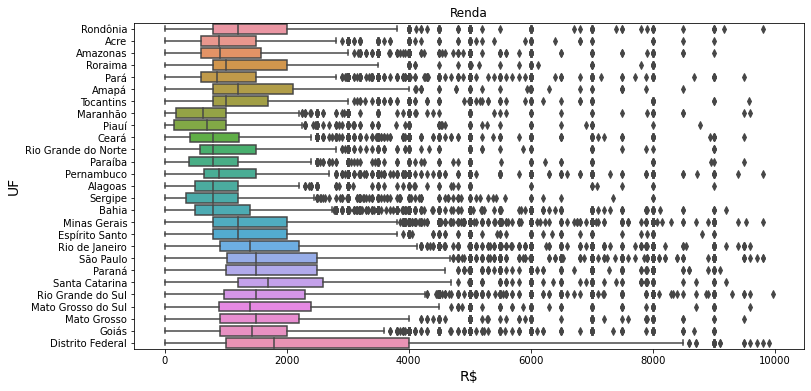

In [44]:
#Box-plot renda por UF
ax = sns.boxplot(x = 'Renda', y = 'UF', data = dados.query('Renda < 10000'),orient='h')
ax.figure.set_size_inches(12,6)
ax.set_title('Renda')
ax.set_ylabel('UF',fontsize=14)
ax.set_yticklabels([value for value in dados_uf.values()])
ax.set_xlabel('R$', fontsize = 14)
ax